# Home Credit Data Science Bootcamp - Practice Case 04


This notebook created for Practice Exercise 04 at iykra.<br>

**Author:**<br>
Herdis Haerusalam<br>

**Date:**<br>
1 November 2019

The dataset is a historical flight data in Malaysia from Oct 2018 – Nov 2018. There are several questions regarding the dataset, and this notebook to answer those questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, auc, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

import datetime

## Dataset

In [2]:
# load dataset
data = pd.read_csv('training_dataset.csv')
data.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [3]:
data.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
number,AK6430,ID*7164,MXD9116,AK5198,AK516
airline,AK,ID*,MXD,AK,AK
airline_name,AirAsia,Batik Air,Malindo Air,AirAsia,AirAsia
scheduled_departure_time,2018-10-05 22:00:00,2018-10-05 22:00:00,2018-10-05 22:00:00,2018-10-05 22:05:00,2018-10-05 22:10:00
scheduled_arrival_time,2018-10-05 23:05:00,2018-10-05 23:55:00,2018-10-05 23:55:00,2018-10-06 01:00:00,2018-10-06 01:25:00
departure_airport_city,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur
departure_airport_code,KUL,KUL,KUL,KUL,KUL
departure_airport_country,MY,MY,MY,MY,MY
departure_airport_gate,J15,C33,C33,J9,P1


In [4]:
data.shape

(111068, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [6]:
data.isnull().sum()

id                                0
number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            5
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        44209
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    41340
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          98981
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      58018
arrival_airport_timezone          0
flight_equipment_iata            19
flight_equipment_name            19
flight_duration                   3
delay                             0
dtype: int64

In [7]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,111068,NaN,NaN,NaN,202366,149258,1,61496.8,189314,329683,496596
number,111068,2515,MH5312,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline,111068,104,AK,25437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_name,111068,104,AirAsia,25437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scheduled_departure_time,111068,12912,2018-11-07 23:00:00,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scheduled_arrival_time,111063,14210,2018-10-20 09:30:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_airport_city,111068,15,Kuala Lumpur,69552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_airport_code,111068,16,KUL,62530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_airport_country,111068,1,MY,111068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_airport_gate,66859,189,H2,1358,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleansing

#### Drop Unnecessary Columns (have percentage more than 30% of null data)

So first, we do cleansing data to null data.<br>

In [8]:
perc_null_depgate = data.isnull().sum()['departure_airport_gate']/data.shape[0]
perc_null_depter = data.isnull().sum()['departure_airport_terminal']/data.shape[0]
perc_null_argate = data.isnull().sum()['arrival_airport_gate']/data.shape[0]
perc_null_arter = data.isnull().sum()['arrival_airport_terminal']/data.shape[0]

print('There are {} percent of {} null data'.format(perc_null_depgate * 100, 'departure_airport_gate'))
print('There are {} percent of {} null data'.format(perc_null_depter * 100, 'departure_airport_terminal'))
print('There are {} percent of {} null data'.format(perc_null_argate * 100, 'arrival_airport_gate'))
print('There are {} percent of {} null data'.format(perc_null_arter * 100, 'arrival_airport_terminal'))

There are 39.803543774984696 percent of departure_airport_gate null data
There are 37.22044153131415 percent of departure_airport_terminal null data
There are 89.11747758130154 percent of arrival_airport_gate null data
There are 52.236467749486806 percent of arrival_airport_terminal null data


In [9]:
data = data.drop(columns= ['departure_airport_gate', 
                           'departure_airport_terminal', 
                           'arrival_airport_gate', 
                           'arrival_airport_terminal'])

#### Drop Row that have null data (cannot impute null data)

Then, we drop row that have null number beacause we cannot impute them

In [10]:
data = data.dropna().reset_index(drop=True)

In [11]:
data.isnull().sum()

id                            0
number                        0
airline                       0
airline_name                  0
scheduled_departure_time      0
scheduled_arrival_time        0
departure_airport_city        0
departure_airport_code        0
departure_airport_country     0
departure_airport_name        0
departure_airport_region      0
departure_airport_timezone    0
arrival_airport_city          0
arrival_airport_code          0
arrival_airport_country       0
arrival_airport_name          0
arrival_airport_region        0
arrival_airport_timezone      0
flight_equipment_iata         0
flight_equipment_name         0
flight_duration               0
delay                         0
dtype: int64

In [12]:
data.shape

(111047, 22)

In [13]:
# checking duplciate data
if data.duplicated().sum() == 0:
    print('None of duplicated data')
else:
    print('Duplicated data = {}'.format(data.duplicated().sum()))

None of duplicated data


Based on the percentage of null data, the data who have more than 20% null data is dropped.

## Provide travel recommendation to passenger (best time to take a flight or best airline), so they will not get caught in delay. Each recommendation has to be supported by at least 1 graph 

The best airline based on delay time.

### Based on mean of delay time

In [14]:
data_airline = data.groupby(by= ['airline_name', 'airline']).count().reset_index()[['airline', 'airline_name']]
data_airline

,airline,airline_name
0,LD,AHK
1,NH,ANA
2,KC,Air Astana
3,AC,Air Canada
4,CA,Air China
5,AF,Air France
6,AI,Air India
7,MK,Air Mauritius
8,NZ,Air New Zealand
9,RS*,Air Seoul


In [15]:
data_airline = data_airline.set_index('airline')['airline_name'].to_dict()

In [16]:
data_airline 

{'LD': 'AHK',
 'NH': 'ANA',
 'KC': 'Air Astana',
 'AC': 'Air Canada',
 'CA': 'Air China',
 'AF': 'Air France',
 'AI': 'Air India',
 'MK': 'Air Mauritius',
 'NZ': 'Air New Zealand',
 'RS*': 'Air Seoul',
 'HM': 'Air Seychelles',
 'AK': 'AirAsia',
 'D7': 'AirAsia X',
 'AZ': 'Alitalia',
 'AA': 'American Airlines',
 'OZ': 'Asiana Airlines',
 'OS': 'Austrian',
 'PG': 'Bangkok Airways',
 'ID*': 'Batik Air',
 'BG': 'Biman Bangladesh Airlines',
 'BA': 'British Airways',
 'K6': 'Cambodia Angkor Air',
 'CV': 'Cargolux',
 'KA': 'Cathay Dragon',
 'CX': 'Cathay Pacific',
 '5J': 'Cebu Pacific Air',
 'CI': 'China Airlines',
 'MU': 'China Eastern Airlines',
 'CZ': 'China Southern Airlines',
 'CTV': 'Citilink',
 'DE': 'Condor',
 'DL': 'Delta Air Lines',
 'ZE': 'EASTAR JET',
 'BR': 'EVA Air',
 'MS': 'EgyptAir',
 'EK': 'Emirates',
 'ET': 'Ethiopian Airlines',
 'EY': 'Etihad Airways',
 'AY': 'Finnair',
 'FY': 'Firefly',
 'GA': 'Garuda Indonesia',
 'GX*': 'Guangxi Beibu Gulf Airlines',
 'HA': 'Hawaiian Airl

In [17]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = data['delay'].groupby(data['airline_name']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean')[0:9]
global_stats

,count,max,mean,min
airline_name,,,,
Hong Kong Airlines,16.0,0.0,0.000000,0.0
Guangxi Beibu Gulf Airlines,36.0,0.0,0.000000,0.0
Firefly,4465.0,0.0,0.000000,0.0
YTO Cargo,24.0,0.0,0.000000,0.0
Silk Way West,14.0,0.0,0.000000,0.0
TAP Portugal,35.0,23.0,1.485714,0.0
Raya Airways,266.0,175.0,3.097744,0.0
Jeju Air,35.0,26.0,3.657143,0.0
United Airlines,147.0,60.0,5.435374,0.0


Text(0.5, 1.0, '10 best airline besed on mean delay time')

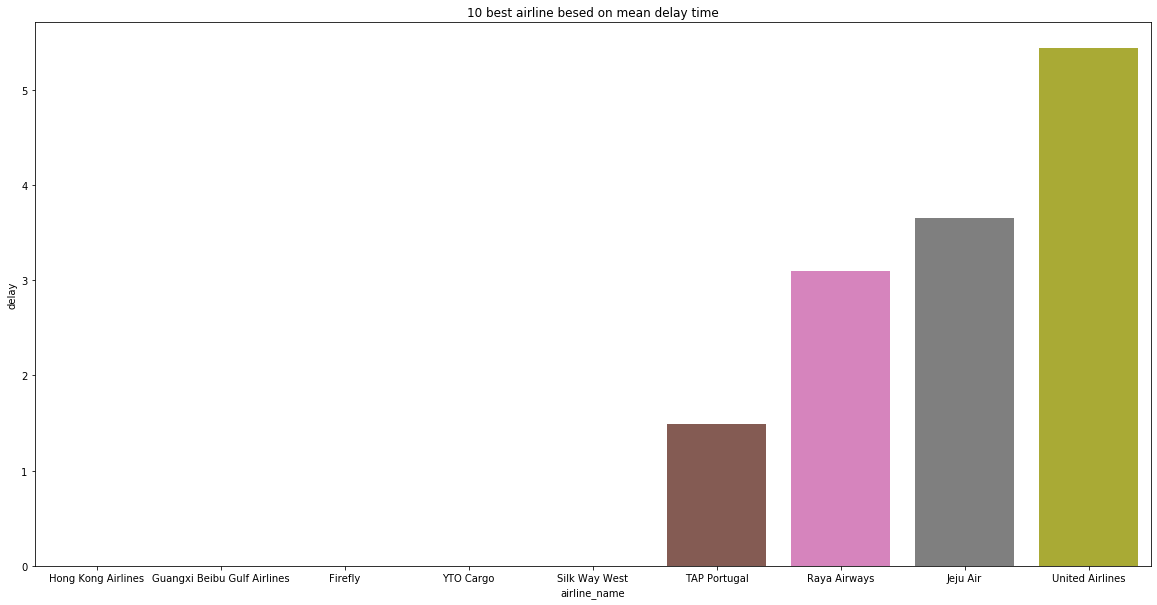

In [18]:
y = global_stats.reset_index()['mean']
x = global_stats.reset_index()['airline_name']

plt.figure(figsize=(20,10))
ax = sns.barplot(x,y)

plt.xlabel('airline_name')
plt.ylabel('delay')
plt.title('10 best airline besed on mean delay time')

### Based on total of delay time

In [19]:
data.groupby('airline_name').sum()[['delay']].sort_values('delay')[0:5]

,delay
airline_name,
Firefly,0
Hong Kong Airlines,0
YTO Cargo,0
Guangxi Beibu Gulf Airlines,0
Silk Way West,0


Text(0.5, 1.0, '10 best airline besed on total delay time')

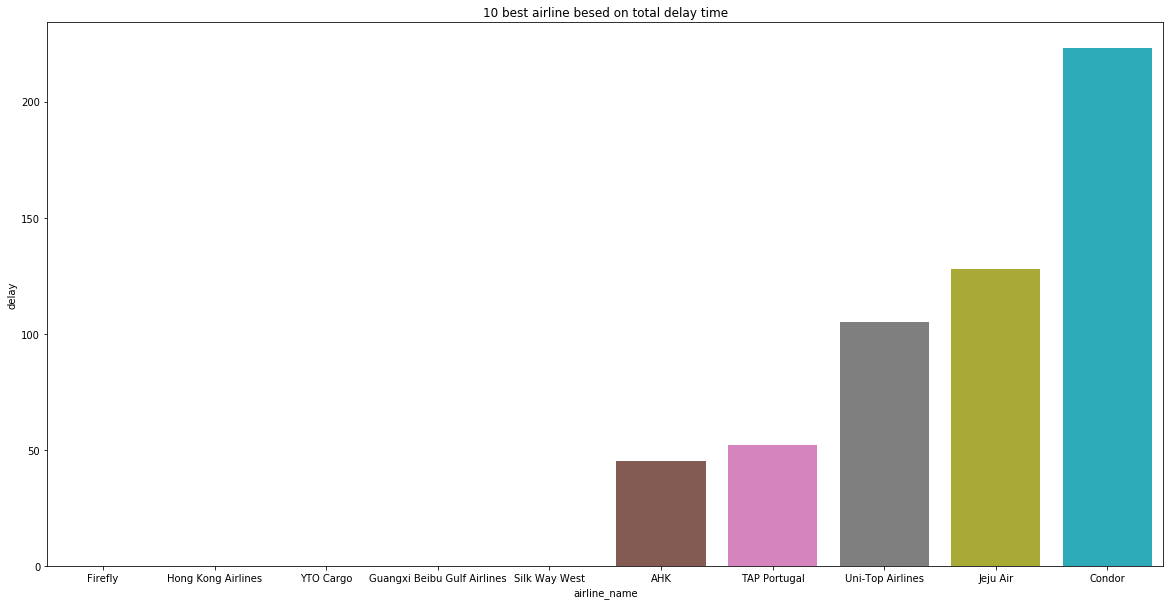

In [21]:
data_plot = data.groupby('airline_name').sum()[['delay']].sort_values('delay')[0:10].reset_index()

y = data_plot['delay']
x = data_plot['airline_name']

plt.figure(figsize=(20,10))
ax = sns.barplot(x,y)

plt.xlabel('airline_name')
plt.ylabel('delay')
plt.title('10 best airline besed on total delay time')


In [22]:
print('The airline recommendation to passenger based on total number and mean of delay are {}, {}, {}, {} and {}'.format(data_plot.iloc[0][0]
                                                                                                 ,data_plot.iloc[1][0]
                                                                                                 ,data_plot.iloc[2][0]
                                                                                                 ,data_plot.iloc[3][0]
                                                                                                 ,data_plot.iloc[4][0]))

The airline recommendation to passenger based on total number and mean of delay are Firefly, Hong Kong Airlines, YTO Cargo, Guangxi Beibu Gulf Airlines and Silk Way West


## Create a model to estimate the delay duration ( Linear Regression )

There are new variables that we introduce:
1. Departure time hour
2. Arrival time hour
3. Departure time day
4. Arrival time day
5. Day of departure weekday (Weekday as a number 1-7, 1 is Sunday)
6. Day of arrival weekday (Weekday as a number 1-7, 1 is Sunday)

### Feature Engineering

#### Training Dataset

In [67]:
# numerical and categoriacl splitting
data_num = data[data.select_dtypes(include = np.number).columns]
data_cat = data[data.select_dtypes(exclude = np.number).columns]

In [68]:
data_num.head()

,id,delay,scheduled_departure_time_hour,scheduled_departure_time_weekday,scheduled_arrival_time_hour,scheduled_arrival_time_weekday
0,1,2,22,6,23,6
1,2,8,22,6,23,6
2,3,8,22,6,23,6
3,4,0,22,7,1,7
4,5,0,22,7,1,7


In [69]:
data_cat.head()

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,departure_airport_region,...,arrival_airport_code,arrival_airport_country,arrival_airport_name,arrival_airport_region,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,scheduled_departure_time_day,scheduled_arrival_time_day
0,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,Asia,...,KBR,MY,Sultan Ismail Petra Airport,Asia,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,Friday,Friday
1,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,Asia,...,CGK,ID,Soekarno-Hatta International Airport,Asia,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,Friday,Friday
2,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,Asia,...,CGK,ID,Soekarno-Hatta International Airport,Asia,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,Friday,Friday
3,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,Asia,...,SDK,MY,Sandakan Airport,Asia,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,Friday,Saturday
4,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,Asia,...,HAN,VN,Noi Bai International Airport,Asia,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,Friday,Saturday


Departure time convesion to numerical

In [70]:
data[['scheduled_departure_time']].head()

,scheduled_departure_time
0,2018-10-05 22:00:00
1,2018-10-05 22:00:00
2,2018-10-05 22:00:00
3,2018-10-05 22:05:00
4,2018-10-05 22:10:00


In [71]:
# scheduled departure time conversion to datetime
data['scheduled_departure_time'] = pd.to_datetime(data['scheduled_departure_time'], format= '%Y-%m-%d %H:%M:%S')
data['scheduled_arrival_time'] = pd.to_datetime(data['scheduled_arrival_time'], format= '%Y-%m-%d %H:%M:%S')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110993 entries, 0 to 110992
Data columns (total 28 columns):
id                                  110993 non-null int64
number                              110993 non-null object
airline                             110993 non-null object
airline_name                        110993 non-null object
scheduled_departure_time            110993 non-null datetime64[ns]
scheduled_arrival_time              110993 non-null datetime64[ns]
departure_airport_city              110993 non-null object
departure_airport_code              110993 non-null object
departure_airport_country           110993 non-null object
departure_airport_name              110993 non-null object
departure_airport_region            110993 non-null object
departure_airport_timezone          110993 non-null object
arrival_airport_city                110993 non-null object
arrival_airport_code                110993 non-null object
arrival_airport_country             110993 non-n

In [73]:
data['scheduled_departure_time_hour'] = data.scheduled_departure_time.apply(lambda x: x.hour)
data['scheduled_departure_time_day'] = data.scheduled_departure_time.apply(lambda x: x.strftime('%A'))
# data['scheduled_departure_time_month'] = data.scheduled_departure_time.apply(lambda x: x.month)
data['scheduled_departure_time_weekday'] = data.scheduled_arrival_time.apply(lambda x: x.strftime('%w'))
data['scheduled_arrival_time_hour'] = data.scheduled_arrival_time.apply(lambda x: x.hour)
data['scheduled_arrival_time_day'] = data.scheduled_arrival_time.apply(lambda x: x.strftime('%A'))
# data['scheduled_arrival_time_month'] = data.scheduled_arrival_time.apply(lambda x: x.month)
data['scheduled_arrival_time_weekday'] = data.scheduled_arrival_time.apply(lambda x: x.strftime('%w'))

In [74]:
data['scheduled_departure_time_weekday'] = pd.to_numeric(data['scheduled_departure_time_weekday'])
data['scheduled_arrival_time_weekday'] = pd.to_numeric(data['scheduled_arrival_time_weekday'])

In [75]:
data['scheduled_departure_time_weekday'] = data['scheduled_departure_time_weekday'] +1 
data['scheduled_arrival_time_weekday'] = data['scheduled_arrival_time_weekday'] +1 

In [76]:
data.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
number,AK6430,ID*7164,MXD9116,AK5198,AK516
airline,AK,ID*,MXD,AK,AK
airline_name,AirAsia,Batik Air,Malindo Air,AirAsia,AirAsia
scheduled_departure_time,2018-10-05 22:00:00,2018-10-05 22:00:00,2018-10-05 22:00:00,2018-10-05 22:05:00,2018-10-05 22:10:00
scheduled_arrival_time,2018-10-05 23:05:00,2018-10-05 23:55:00,2018-10-05 23:55:00,2018-10-06 01:00:00,2018-10-06 01:25:00
departure_airport_city,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur,Kuala Lumpur
departure_airport_code,KUL,KUL,KUL,KUL,KUL
departure_airport_country,MY,MY,MY,MY,MY
departure_airport_name,Kuala Lumpur International Airport,Kuala Lumpur International Airport,Kuala Lumpur International Airport,Kuala Lumpur International Airport,Kuala Lumpur International Airport


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110993 entries, 0 to 110992
Data columns (total 28 columns):
id                                  110993 non-null int64
number                              110993 non-null object
airline                             110993 non-null object
airline_name                        110993 non-null object
scheduled_departure_time            110993 non-null datetime64[ns]
scheduled_arrival_time              110993 non-null datetime64[ns]
departure_airport_city              110993 non-null object
departure_airport_code              110993 non-null object
departure_airport_country           110993 non-null object
departure_airport_name              110993 non-null object
departure_airport_region            110993 non-null object
departure_airport_timezone          110993 non-null object
arrival_airport_city                110993 non-null object
arrival_airport_code                110993 non-null object
arrival_airport_country             110993 non-n

#### Test Dataset

In [78]:
data_test = pd.read_csv('test_dataset.csv')

In [79]:
data_test = data_test.drop(columns= ['departure_airport_gate', 
                           'departure_airport_terminal', 
                           'arrival_airport_gate', 
                           'arrival_airport_terminal'])

In [80]:
data_test = data_test.dropna().reset_index(drop=True)

In [81]:
data_test.groupby('airline').count()

,id,number,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,departure_airport_region,...,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_name,arrival_airport_region,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
airline,,,,,,,,,,,,,,,,,,,,,
3K,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
5J,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
6E,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
7C*,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
7L*,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
8L,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
8M,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
9C,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
9W,404,404,404,404,404,404,404,404,404,404,...,404,404,404,404,404,404,404,404,404,404


In [82]:
# numerical and categoriacl splitting
data_test_num = data_test[data_test.select_dtypes(include = np.number).columns]
data_test_cat = data_test[data_test.select_dtypes(exclude = np.number).columns]

In [83]:
# scheduled departure time conversion to datetime
data_test['scheduled_departure_time'] = pd.to_datetime(data_test['scheduled_departure_time'], format= '%Y-%m-%d %H:%M:%S')
data_test['scheduled_arrival_time'] = pd.to_datetime(data_test['scheduled_arrival_time'], format= '%Y-%m-%d %H:%M:%S')

In [84]:
data_test['scheduled_departure_time_hour'] = data_test.scheduled_departure_time.apply(lambda x: x.hour)
data_test['scheduled_departure_time_day'] = data_test.scheduled_departure_time.apply(lambda x: x.strftime('%A'))
# data['scheduled_departure_time_month'] = data.scheduled_departure_time.apply(lambda x: x.month)
data_test['scheduled_departure_time_weekday'] = data_test.scheduled_arrival_time.apply(lambda x: x.strftime('%w'))
data_test['scheduled_arrival_time_hour'] = data_test.scheduled_arrival_time.apply(lambda x: x.hour)
data_test['scheduled_arrival_time_day'] = data_test.scheduled_arrival_time.apply(lambda x: x.strftime('%A'))
# data['scheduled_arrival_time_month'] = data.scheduled_arrival_time.apply(lambda x: x.month)
data_test['scheduled_arrival_time_weekday'] = data_test.scheduled_arrival_time.apply(lambda x: x.strftime('%w'))

data_test['scheduled_departure_time_weekday'] = pd.to_numeric(data_test['scheduled_departure_time_weekday'])
data_test['scheduled_arrival_time_weekday'] = pd.to_numeric(data_test['scheduled_arrival_time_weekday'])

data_test['scheduled_departure_time_weekday'] = data_test['scheduled_departure_time_weekday'] +1 
data_test['scheduled_arrival_time_weekday'] = data_test['scheduled_arrival_time_weekday'] +1 

In [85]:
data_test.shape

(41554, 28)

In [86]:
data.shape

(110993, 28)

In [87]:
# dum = []
# for i in data['airline'].unique():
#     if i not in data_test['airline'].unique():
#         dum.append(i)
# for i in data_test['airline'].unique():
#     if i not in data['airline'].unique():
#         dum.append(i)

In [88]:
# data = data[(data['airline'] != dum[0]) 
#             & (data['airline'] != dum[1]) 
#             & (data['airline'] != dum[2]) 
#             & (data['airline'] != dum[3])].reset_index(drop=True)
# data_test = data_test[(data_test['airline'] != dum[0]) 
#                       & (data_test['airline'] != dum[1]) 
#                       & (data_test['airline'] != dum[2]) 
#                       & (data_test['airline'] != dum[3])].reset_index(drop=True)

In [89]:
# print(len(data['airline'].unique()))
# print(len(data_test['airline'].unique()))

In [90]:
# print(len(data['departure_airport_name'].unique()))
# print(len(data_test['departure_airport_name'].unique()))

In [91]:
# dum2 = []
# for i in data['departure_airport_name'].unique():
#     if i not in data_test['departure_airport_name'].unique():
#         dum2.append(i)
# for i in data_test['departure_airport_name'].unique():
#     if i not in data['departure_airport_name'].unique():
#         dum2.append(i)

In [92]:
# data = data[data['departure_airport_name'] != dum2[0]].reset_index(drop=True)
# data_test = data_test[data_test['departure_airport_name'] != dum2[0]].reset_index(drop=True)

In [93]:
# print(len(data['departure_airport_name'].unique()))
# print(len(data_test['departure_airport_name'].unique()))

### Model

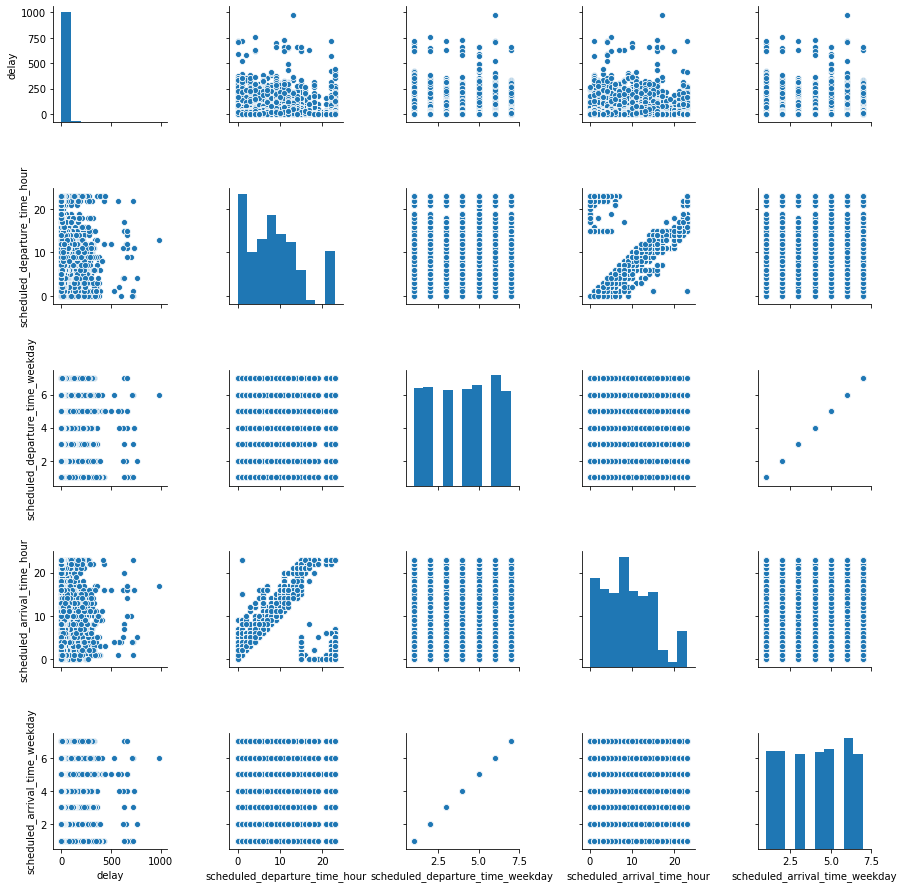

In [94]:
# Correlation between variables
sns.pairplot(data[['delay'
                   ,'scheduled_departure_time_hour'
                   ,'scheduled_departure_time_weekday'
                   ,'scheduled_arrival_time_hour'
                   ,'scheduled_arrival_time_weekday']])

In [95]:
corr = data.corr().transpose()
corr

,id,delay,scheduled_departure_time_hour,scheduled_departure_time_weekday,scheduled_arrival_time_hour,scheduled_arrival_time_weekday
id,1.000000,0.064777,0.028169,0.013938,0.016243,0.013938
delay,0.064777,1.000000,-0.007519,0.025782,0.073570,0.025782
scheduled_departure_time_hour,0.028169,-0.007519,1.000000,-0.003297,0.464363,-0.003297
scheduled_departure_time_weekday,0.013938,0.025782,-0.003297,1.000000,-0.009906,1.000000
scheduled_arrival_time_hour,0.016243,0.073570,0.464363,-0.009906,1.000000,-0.009906
scheduled_arrival_time_weekday,0.013938,0.025782,-0.003297,1.000000,-0.009906,1.000000


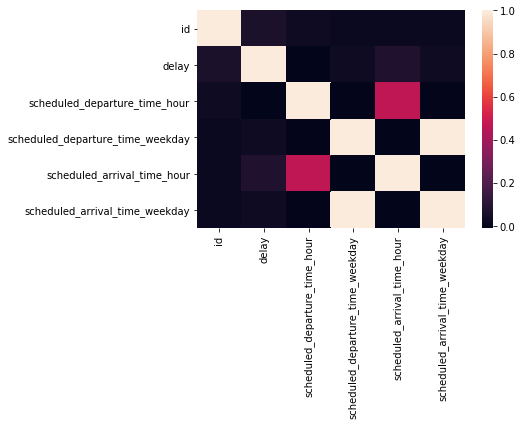

In [96]:
sns.heatmap(corr)

from the correlation table, we can see that:
1. Delay to scheduled_departure_time_hour have negative correlation, **it means that higher time hour (night) will be reduce delay time.**

Text(0.5, 1.0, 'scheduled_departure_time_hour to delay')

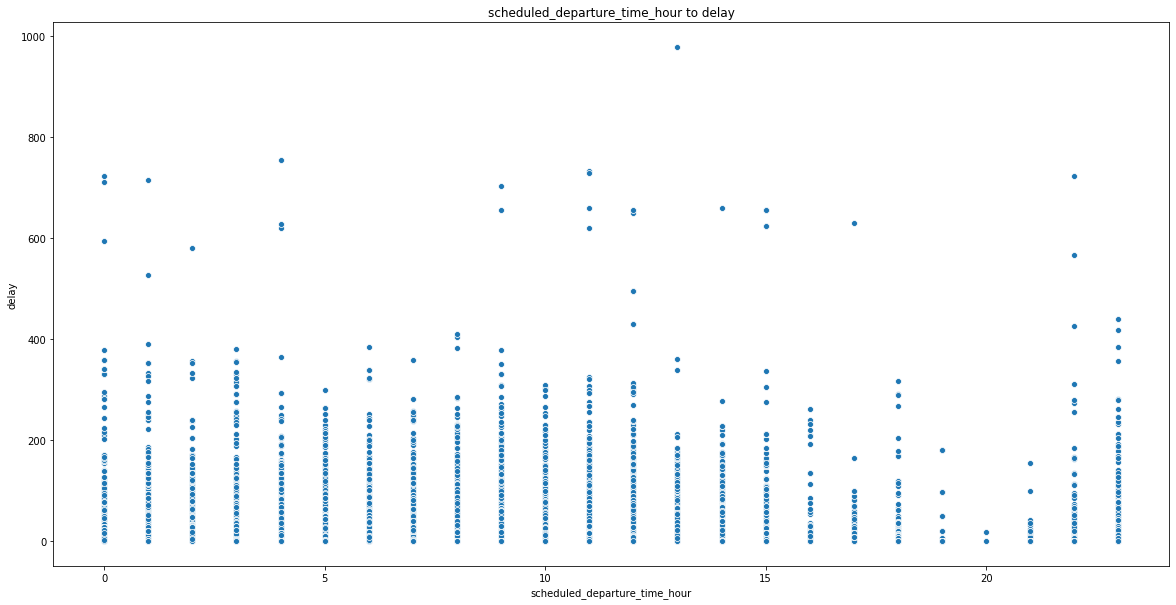

In [97]:
# scheduled_arrival_time_hour to delay plotting
y = data['delay']
x = data['scheduled_departure_time_hour']

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x,y)

plt.xlabel('scheduled_departure_time_hour')
plt.ylabel('delay')
plt.title('scheduled_departure_time_hour to delay')


Text(0.5, 1.0, 'scheduled_arrival_time_hour to delay')

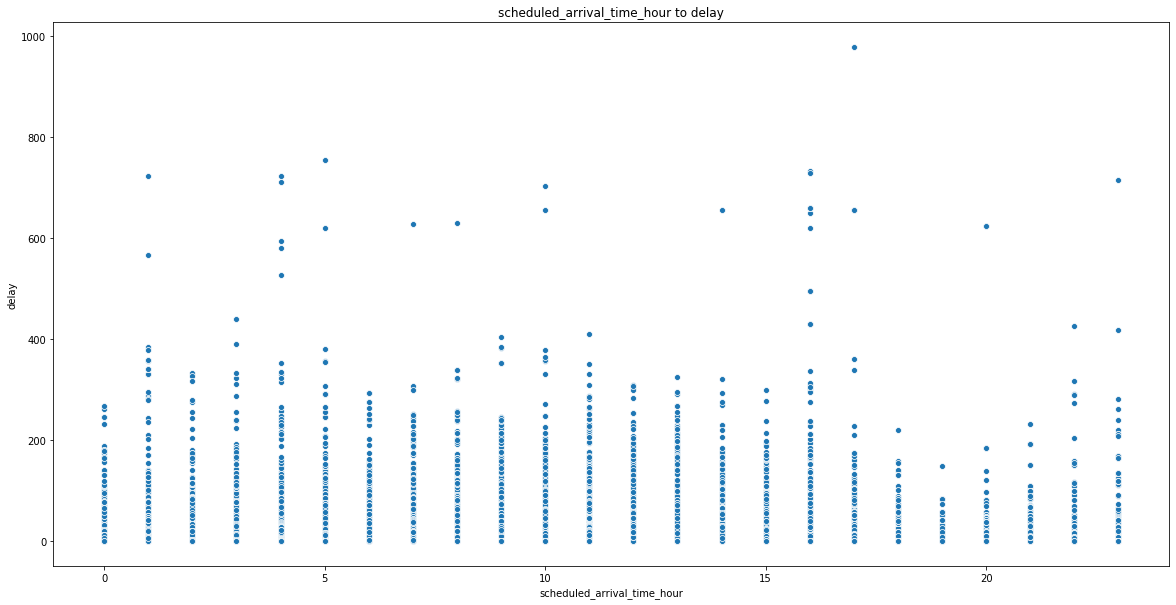

In [98]:
# scheduled_arrival_time_hour to delay plotting
y = data['delay']
x = data['scheduled_arrival_time_hour']

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x,y)

plt.xlabel('scheduled_arrival_time_hour')
plt.ylabel('delay')
plt.title('scheduled_arrival_time_hour to delay')


In [99]:
data.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,...,flight_equipment_iata,flight_equipment_name,flight_duration,delay,scheduled_departure_time_hour,scheduled_departure_time_day,scheduled_departure_time_weekday,scheduled_arrival_time_hour,scheduled_arrival_time_day,scheduled_arrival_time_weekday
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,32S,Airbus A318 / A319 / A320 / A321,58m,2,22,Friday,6,23,Friday,6
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,22,Friday,6,23,Friday,6
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,22,Friday,6,23,Friday,6
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,22,Friday,7,1,Saturday,7
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,22,Friday,7,1,Saturday,7


#### Liniear Regression 

In [100]:
data_prepare_train = data.copy()
data_prepare_test = data_test.copy()

In [101]:
# data_prepare_train = data_prepare_train[['scheduled_arrival_time_hour', 'delay']]
# data_prepare_test = data_prepare_test[['scheduled_arrival_time_hour', 'delay']]
x_train = data_prepare_train['scheduled_departure_time_hour'].values.reshape(-1,1)
y_train = data_prepare_train['delay'].values.reshape(-1,1)

x_test = data_prepare_test['scheduled_departure_time_hour'].values.reshape(-1,1)
y_test = data_prepare_test['delay'].values.reshape(-1,1)

In [102]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred_train = regression.predict(x_train)
y_pred_test = regression.predict(x_test)

In [104]:
print(mean_squared_error(y_pred_test, y_test))

1004.904672643507


In [105]:
print('mse train = {}'.format(mean_squared_error(y_pred_train, y_train)))

mse train = 718.9521437259531


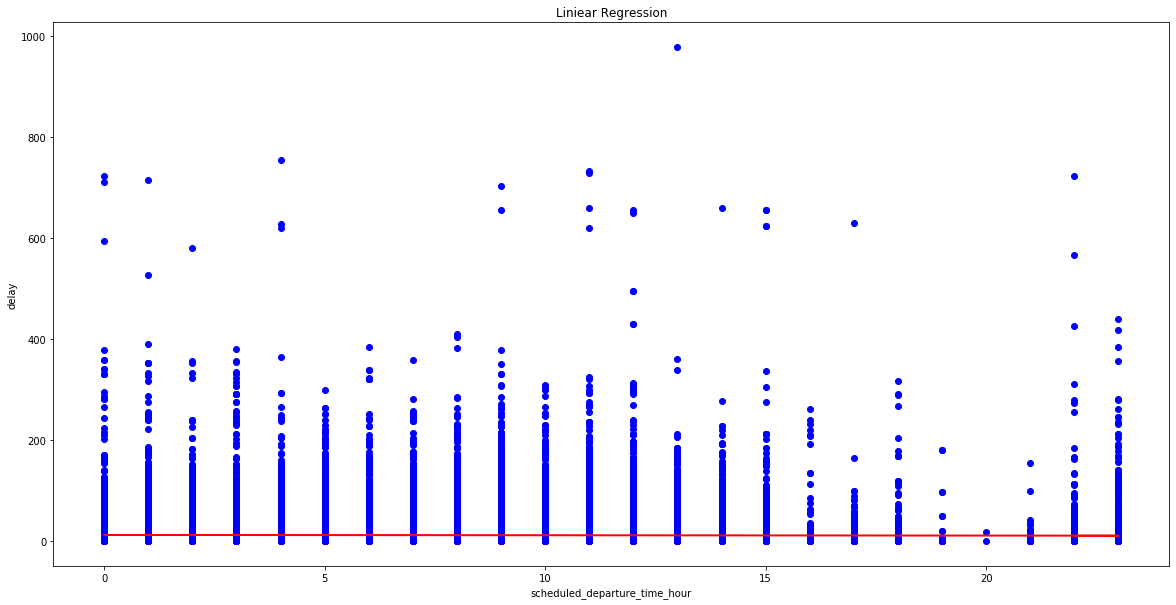

In [106]:
plt.figure(figsize=(20,10))
plt.scatter(x_train,y_train, c='blue')
plt.plot(x_train,y_pred_train, c='red')
plt.xlabel('scheduled_departure_time_hour')
plt.ylabel('delay')
plt.title('Liniear Regression')
plt.show()

In [119]:
# res = y_pred_test - y_train
# plt.hist(res, bins=10)

## Create a model to predict delay > 60 min ( Logistic regression and another supervised model you choosing )

In [108]:
datasets_dummies_train = pd.get_dummies(data_prepare_train[['airline', 
                   'departure_airport_name', 
                   'scheduled_departure_time_day']], drop_first=True)

datasets_dummies_test = pd.get_dummies(data_prepare_test[['airline', 
                   'departure_airport_name', 
                   'scheduled_departure_time_day']], drop_first=True)

In [109]:
a_train = data_prepare_train[['scheduled_departure_time_hour',
                   'scheduled_arrival_time_hour']]
a_test = data_prepare_test[['scheduled_departure_time_hour',
                   'scheduled_arrival_time_hour']]

In [110]:
data_model_train = pd.concat([a_train, datasets_dummies_train, data_prepare_train['delay']], axis = 1)
data_model_test = pd.concat([a_test, datasets_dummies_test, data_prepare_test['delay']], axis = 1)

In [111]:
x_train = data_model_train.iloc[:,0:len(data_model_train.columns)-1]
y_train = data_model_train.iloc[:,len(data_model_train.columns)-1].values.reshape(-1,1)

x_test = data_model_test.iloc[:,0:len(data_model_test.columns)-1]
y_test = data_model_test.iloc[:,len(data_model_test.columns)-1].values.reshape(-1,1)
x_train = preprocessing.normalize(x_train)

In [112]:
data_prepare_train.groupby('airline').count()

,id,number,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,departure_airport_region,...,flight_equipment_iata,flight_equipment_name,flight_duration,delay,scheduled_departure_time_hour,scheduled_departure_time_day,scheduled_departure_time_weekday,scheduled_arrival_time_hour,scheduled_arrival_time_day,scheduled_arrival_time_weekday
airline,,,,,,,,,,,,,,,,,,,,,
3K,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
5J,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
6E,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
7C*,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
7L*,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
8L,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
8M,519,519,519,519,519,519,519,519,519,519,...,519,519,519,519,519,519,519,519,519,519
9C,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
9W,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,...,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149


In [113]:
data_prepare_train.isnull().sum()

id                                  0
number                              0
airline                             0
airline_name                        0
scheduled_departure_time            0
scheduled_arrival_time              0
departure_airport_city              0
departure_airport_code              0
departure_airport_country           0
departure_airport_name              0
departure_airport_region            0
departure_airport_timezone          0
arrival_airport_city                0
arrival_airport_code                0
arrival_airport_country             0
arrival_airport_name                0
arrival_airport_region              0
arrival_airport_timezone            0
flight_equipment_iata               0
flight_equipment_name               0
flight_duration                     0
delay                               0
scheduled_departure_time_hour       0
scheduled_departure_time_day        0
scheduled_departure_time_weekday    0
scheduled_arrival_time_hour         0
scheduled_ar

In [114]:
data_prepare_test.groupby('airline').count()

,id,number,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,departure_airport_region,...,flight_equipment_iata,flight_equipment_name,flight_duration,delay,scheduled_departure_time_hour,scheduled_departure_time_day,scheduled_departure_time_weekday,scheduled_arrival_time_hour,scheduled_arrival_time_day,scheduled_arrival_time_weekday
airline,,,,,,,,,,,,,,,,,,,,,
3K,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
5J,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
6E,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
7C*,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
7L*,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
8L,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
8M,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
9C,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
9W,404,404,404,404,404,404,404,404,404,404,...,404,404,404,404,404,404,404,404,404,404


In [115]:
data_prepare_test.isnull().sum()

id                                  0
number                              0
airline                             0
airline_name                        0
scheduled_departure_time            0
scheduled_arrival_time              0
departure_airport_city              0
departure_airport_code              0
departure_airport_country           0
departure_airport_name              0
departure_airport_region            0
departure_airport_timezone          0
arrival_airport_city                0
arrival_airport_code                0
arrival_airport_country             0
arrival_airport_name                0
arrival_airport_region              0
arrival_airport_timezone            0
flight_equipment_iata               0
flight_equipment_name               0
flight_duration                     0
delay                               0
scheduled_departure_time_hour       0
scheduled_departure_time_day        0
scheduled_departure_time_weekday    0
scheduled_arrival_time_hour         0
scheduled_ar

In [116]:
mult_regression = LinearRegression(normalize=True)
mult_regression.fit(x_train, y_train)

y_pred_test = mult_regression.predict(x_test)
y_pred_train = mult_regression.predict(x_train)



ValueError: shapes (41554,124) and (122,1) not aligned: 124 (dim 1) != 122 (dim 0)

There are error in multivarite regression

In [117]:
y_pred_test_2 = regression.predict(x_test)

ValueError: shapes (41554,124) and (1,1) not aligned: 124 (dim 1) != 1 (dim 0)

In [120]:
log_regression = LogisticRegression(solver='lbfgs',multi_class='auto')
log_regression.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
y_pred = regression.predict(x_test)

ValueError: shapes (41554,124) and (1,1) not aligned: 124 (dim 1) != 1 (dim 0)

In [ ]:
print("MSE Y Test logistic regression = ", mean_squared_error(y_pred,y_test))

## Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created

Yes, there are new variables that we introduce:
1. Departure time hour -> conversion from str to int
2. Arrival time hour -> conversion from str to int
3. Departure time day -> to get more insight on how can be delay correlate to hour in day
4. Arrival time day -> to get more insight on how can be delay correlate to hour in day?
5. Day of departure weekday (Weekday as a number 1-7, 1 is Sunday) -> to get more insight on how can be delay correlate to day?
6. Day of arrival weekday (Weekday as a number 1-7, 1 is Sunday) -> to get more insight on how can be delay correlate to day?

## Using those models predict delay that will happened in December for delay >60